In [4]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline  
from __future__ import print_function

In [235]:
# Declaration
Nephropathy = ['A', 'B', 'C']
Neuropathy = ['1', '2', '3']

In [250]:
class Model(object):
    """A general model class"""
    def __init__(self, states, parameters=None, submodels=None):
        # States should be a dictionary for the different states
        self.states = states
        # Make to types of states: Discrete states and continuous states
        self.parameters = parameters
        self.time = []
        self.submodels = submodels
        
    def rhs(self, state, time):
        P = self.parameters["P"]
        return P
    
    def update(self, state, time):
        # Update all submodels
        if self.submodels:
            self.submodels.update(self.submodels.states, time)
        
        # Make this somehow into a loop over all states going through a dictionary of functions
        # A1c state
        currentstate = self.states["A1c"][-1]
        newstate = currentstate + 0.01*np.random.random_sample()
        self.states["A1c"].append(newstate)
        
        # Nephropathy
        currentstate = self.states["Nephropathy"][-1]
        newstate = np.random.choice(Nephropathy, None, p=self.rhs(currentstate, time)[Nephropathy.index(currentstate),:])
        self.states["Nephropathy"].append(newstate)
        
        # Time step
        self.time.append(time)


In [251]:
# Simulate Model
def simulate(model, tspan):
    for t in tspan:
        model.update(model.states, t)

In [259]:
parameters = {"P" : np.array([[0.9, 0.1, 0],[0, 0.8, 0.2],[0.01, 0, 0.99]])}
states = {
    "Nephropathy": [np.random.choice(Nephropathy)],
    "A1c"        : [0.05]
    }
substates = {
    "Nephropathy": [np.random.choice(Nephropathy)],
    "A1c"        : [0.05]
    }

submodel = Model(substates,parameters)
model = Model(states,parameters,submodel)

simulate(model, range(100))

print(model.submodels.states)
print(model.states)

{'A1c': [0.05, 0.05669507467093344, 0.06519281905145284, 0.06615860670386503, 0.07523640084365837, 0.08384454892704324, 0.08488695856225871, 0.09154453316124914, 0.09560180847634502, 0.10030935595040656, 0.10095333468235797, 0.10771577759644284, 0.11547998756373787, 0.12361739331832103, 0.12422587538877546, 0.13314582839253622, 0.14008713595161557, 0.1436773257482252, 0.15218068699037993, 0.15223243894316105, 0.16178423652933585, 0.168551808915684, 0.17158552866779161, 0.17972149601662213, 0.1867244148838939, 0.19259125334672172, 0.19538812063540215, 0.19951523351843883, 0.2058539320272171, 0.20832467004136154, 0.21444905959944888, 0.21753539733971153, 0.22733923835835715, 0.2274718989990434, 0.23623108861283268, 0.23793087835601376, 0.24234021779666334, 0.2429353302301125, 0.24694893857397598, 0.251657173943307, 0.25791346915990576, 0.25802071733239335, 0.2628392513549057, 0.2714305893553559, 0.27511288046830257, 0.28028551898271126, 0.28341414277734445, 0.2861008254854346, 0.29307457

In [263]:
# Simulate Cohort
tspan = range(100)
cohort = []

for i in range(100):
    # Initialize
    states = {
        "Nephropathy": [np.random.choice(Nephropathy)],
        "A1c"        : [0.05]
        }    
    substates = {
        "Nephropathy": [np.random.choice(Nephropathy)],
        "A1c"        : [0.05]
        }

    submodel = Model(substates,parameters)
    
    cohort.append(Model(states,parameters,submodel))
    # Simulate
    simulate(cohort[-1],tspan)

# Output    
print(len(cohort),cohort[1].states)

100 {'A1c': [0.05, 0.05212844926198338, 0.05219767886548339, 0.06215156578922244, 0.06714516732316772, 0.07452779235089671, 0.08389272474845477, 0.0865911045971642, 0.09532324414881146, 0.0983894383696849, 0.10249157476223575, 0.10368438043937879, 0.10652655358685871, 0.11260223312627743, 0.11593943459931125, 0.11697476068766673, 0.12398194780747888, 0.12603346072082752, 0.13001526103457484, 0.13513849128622732, 0.13721569620644486, 0.14388205869630355, 0.14460606383032623, 0.15215930679110323, 0.1525993907788763, 0.16212881968908247, 0.17065771279232628, 0.17313138449873341, 0.17332263631623485, 0.17451550529905843, 0.18431956482887268, 0.19059884122122472, 0.19331033070770454, 0.19471576161287013, 0.1978307679301397, 0.199826010728662, 0.20400425268110564, 0.20568290559754987, 0.20647621026803786, 0.21078296893101442, 0.21712622887786298, 0.22503133336283535, 0.22809908913734847, 0.23791854481983252, 0.24136616107468797, 0.24555318661046857, 0.24815637530128346, 0.251910628618744, 0.

## Inheritance

[0, 0, 0, 0, 0, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


(array([  6.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,  94.]),
 array([ 0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2,  1.4,  1.6,  1.8,  2. ]),
 <a list of 10 Patch objects>)

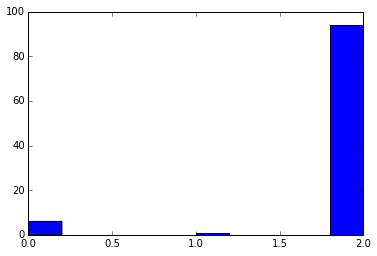

In [29]:
P = np.array([[0.9, 0.1, 0],[0, 0.8, 0.2],[0.01, 0, 0.99]])
x=[]
x.append(0)
for i in range(100):
    x.append(np.random.choice([0, 1 ,2], 1, p=P[x[i],:])[0])
print(x)
plt.hist(x)